<a href="https://colab.research.google.com/github/r2x4/machine_alura_oracle/blob/main/clasificacion%20y%20validacion%20metricas/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv('/content/prestacar.csv')

In [3]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_cliente    54025 non-null  float64
 1   anualidad_prestamo  54025 non-null  float64
 2   años_casa_propia    54025 non-null  float64
 3   telefono_trab       54025 non-null  int64  
 4   evaluacion_ciudad   54025 non-null  float64
 5   score_1             54025 non-null  float64
 6   score_2             54025 non-null  float64
 7   score_3             54025 non-null  float64
 8   score_social        54025 non-null  float64
 9   cambio_telefono     54025 non-null  float64
 10  moroso              54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [5]:
datos.describe()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
count,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000
mean,17410.722321,2779.063672,12.147035,0.278075,2.022922,0.490915,0.522771,0.512252,0.117734,975.491009,0.087293
std,9658.762569,1305.364734,7.452120,0.448055,0.498807,0.142389,0.875945,0.062725,0.076180,818.141709,0.282266
min,2700.000000,218.700000,0.000000,0.000000,1.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000
25%,11700.000000,2002.500000,12.157324,0.000000,2.000000,0.492810,0.407054,0.513171,0.091800,302.000000,0.000000
50%,16855.246324,2722.188351,12.157324,0.000000,2.000000,0.501213,0.554789,0.513171,0.117428,810.000000,0.000000
75%,20250.000000,3199.500000,12.157324,1.000000,2.000000,0.501213,0.659141,0.513171,0.117428,1563.000000,0.000000
max,450000.000000,22500.000000,69.000000,1.000000,3.000000,0.942680,100.000000,0.869211,1.000000,4185.000000,1.000000


In [6]:
datos.isnull().sum()

,0
ingresos_cliente,0
anualidad_prestamo,0
años_casa_propia,0
telefono_trab,0
evaluacion_ciudad,0
score_1,0
score_2,0
score_3,0
score_social,0
cambio_telefono,0


In [7]:
# variables de respuesta

X = datos.drop(columns='moroso', axis=1)
y = datos['moroso']

In [8]:
# arbol de decicion modelo

from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [9]:
print(f'La precisión del modelo es de {modelo.score(X, y)}')

La precisión del modelo es de 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [10]:
# modelo de entrenamiento y prueba

import sklearn
from sklearn.model_selection import train_test_split

In [11]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [12]:
# se esta dejando vacio el decicion no es buena practica ojo
# modelo 100% train y el de validacion 84%
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'La precisión del modelo train es de : {modelo.score(X_train, y_train)}')
print(f'La precisión del modelo de validacion es de : {modelo.score(X_val, y_val)}')

La precisión del modelo train es de : 1.0
La precisión del modelo de validacion es de : 0.8481839561013849


In [13]:
# debemos colcarle profundidad para mejor funcionamiento
# modelo 92% train y el de validacion 90%
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'La precisión del modelo train es de : {modelo.score(X_train, y_train)}')
print(f'La precisión del modelo de validacion es de : {modelo.score(X_val, y_val)}')

La precisión del modelo train es de : 0.9205574912891986
La precisión del modelo de validacion es de : 0.9056702377841651


### Evaluando el modelo

In [14]:
# evaluar el modelo con matriz de confusion
from sklearn.metrics import confusion_matrix

In [15]:
# crear variable
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10357   122]
 [  961    41]]


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

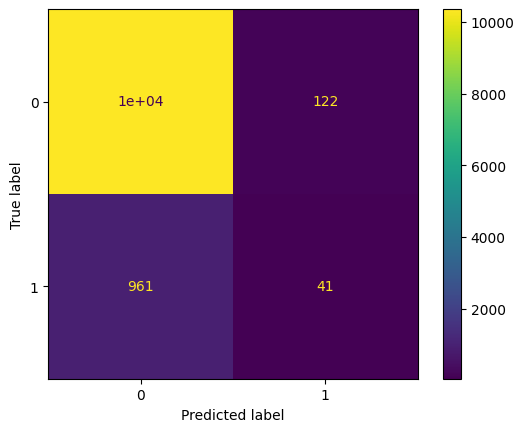

In [17]:
# visualizar

visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot();

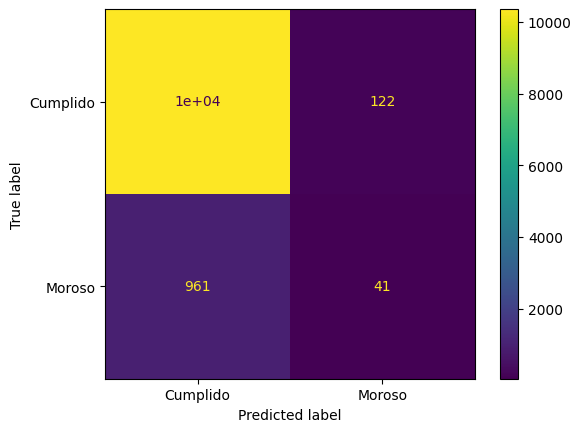

In [18]:

visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
# precicsion
45/(45+125)

0.2647058823529412

In [21]:
print(f'La precision del modelo es de {precision_score(y_val, y_previsto)}')
print(f'La sencibilidad (Recall) del modelo es de {recall_score(y_val, y_previsto)}')
print(f'La exactitud del modelo es de {accuracy_score(y_val, y_previsto)}')

La precision del modelo es de 0.25153374233128833
La sencibilidad (Recall) del modelo es de 0.04091816367265469
La exactitud del modelo es de 0.9056702377841651


In [22]:
print(f'La f1 del modelo es de {f1_score(y_val, y_previsto)}')

La f1 del modelo es de 0.0703862660944206


### Curva ROC

In [23]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [24]:
# importar roc
from sklearn.metrics import RocCurveDisplay

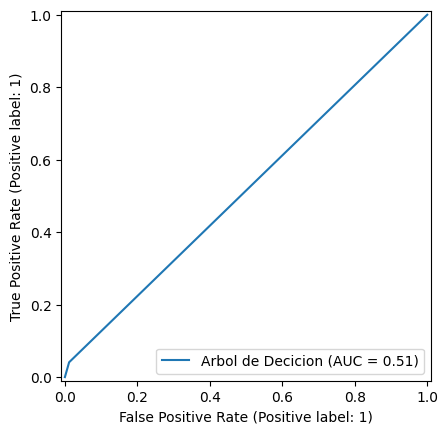

In [25]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arbol de Decicion');

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
print(f'El area bajo la curva ROC es : {roc_auc_score(y_val, y_previsto)}')

El area bajo la curva ROC es : 0.51463791569452


### Curva de  precisión x sensibilidad

In [28]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [29]:
from sklearn.metrics import PrecisionRecallDisplay

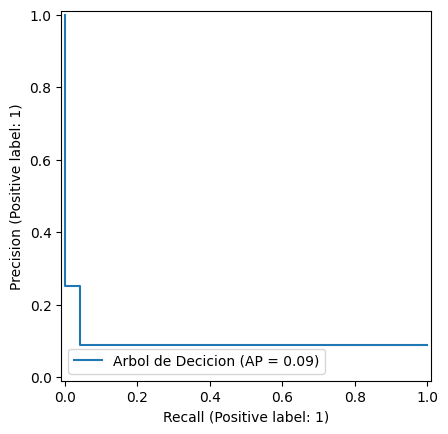

In [30]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Arbol de Decicion');

In [31]:
from sklearn.metrics import average_precision_score

In [32]:
print(f'El area bajo la curva de precisión y sensibilidad es : {average_precision_score(y_val, y_previsto)}')

El area bajo la curva de precisión y sensibilidad es : 0.09399580898510673


### Informe de métricas

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [35]:
# validacion cruzada
from sklearn.model_selection import KFold, cross_validate

In [36]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.24561334, 0.23645282, 0.23565865, 0.22899985, 0.22990012]),
 'score_time': array([0.0034399 , 0.00334692, 0.0035181 , 0.00336719, 0.00338292]),
 'test_score': array([0.91333696, 0.90777439, 0.90744774, 0.91310976, 0.89917247])}

In [37]:
cv_resultados['test_score']

array([0.91333696, 0.90777439, 0.90744774, 0.91310976, 0.89917247])

In [38]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'La promedio de la exactitud es de : {promedio}')
print(f'El desvio tipico es de : {desvio_std}')
print(f'El intervalo de confianza es de : [{promedio - 2*desvio_std} a {min(promedio + 2*desvio_std, 1)}]')

La promedio de la exactitud es de : 0.9081682635678912
El desvio tipico es de : 0.005152326195162098
El intervalo de confianza es de : [0.897863611177567 a 0.9184729159582153]


### Validación cruzada con sensibilidad

In [39]:
# crear funcion

def intervalo_confianza(resultados):
  promedio = cv_resultados['test_score'].mean()
  desvio_std = cv_resultados['test_score'].std()
  return f'El intervalo de confianza es : [{(promedio - 2*desvio_std)} a {min(promedio + 2*desvio_std, 1)}]'


In [40]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.24918127, 0.22911954, 0.22545457, 0.23665357, 0.25862312]),
 'score_time': array([0.00575328, 0.00703764, 0.00811434, 0.00670195, 0.00823021]),
 'test_score': array([0.02774108, 0.01608911, 0.0196802 , 0.01697128, 0.02427746])}

In [41]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.012085635613783417 a 0.02981801436896689]'

### Estratificando los datos

In [42]:
datos['moroso'].value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.32184839, 0.30955386, 0.32651877, 0.34971452, 0.33294678]),
 'score_time': array([0.0080626 , 0.00835204, 0.00907063, 0.0098784 , 0.008641  ]),
 'test_score': array([0.03491272, 0.02372035, 0.02992519, 0.02493766, 0.02743142])}

In [45]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.0202187019498069 a 0.036152230892867926]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [46]:
# uso de algoritmo
from imblearn.over_sampling import SMOTE

In [47]:
over_sampling = SMOTE()
x_balanceada, y_balanceada = over_sampling.fit_resample(X, y)

In [48]:
# datos usados
y_balanceada.value_counts()

,count
moroso,
0,41912
1,41912


In [49]:
# porcentajes de los datos usados
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [50]:
# datos sinteticos
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.52030516, 0.59222412, 0.68813729, 0.69492269, 0.70858383]),
 'score_time': array([0.00749326, 0.00980711, 0.0098052 , 0.00984931, 0.01065135]),
 'test_score': array([0.72166547, 0.69911716, 0.71418347, 0.72515806, 0.72679551])}

In [51]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.6971598963600688 a 0.7376079709019444]'

### Pipeline para validación

In [52]:
# balancear
from imblearn.pipeline import Pipeline as imbpipeline

In [53]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo)])

In [54]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf,scoring='recall')

In [55]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.19677572571457905 a 0.30809007482776046]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [56]:
from imblearn.under_sampling import NearMiss

In [57]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf,scoring='recall')

In [58]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es : [0.6273242804223834 a 0.698176574182677]'

### Probando el modelo

In [59]:
under_sampling = NearMiss(version=3)
x_balanceada, y_balanceada = under_sampling.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



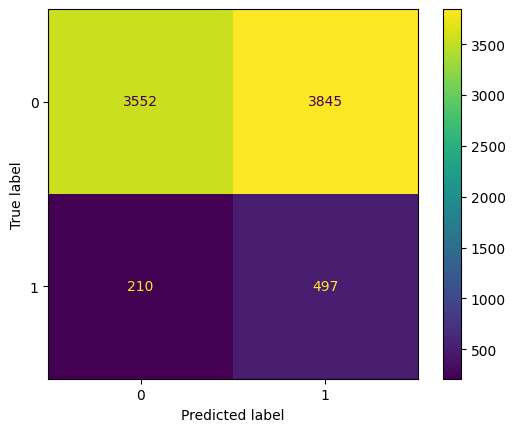

In [60]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);